In [1]:
#import libraries
import pandas as pd

import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [2]:
#open King County House Dataset with pandas
kc_housing = pd.read_csv('kc_house_data.csv')
#data size: 21597 rows x 21 columns

In [3]:
#engineer an extra feature
kc_housing['ratio of bedrooms to sqft_living'] = kc_housing['bedrooms']/kc_housing['sqft_living']

In [4]:
#create a new column for sqft basement 
kc_housing['sqft basement'] = kc_housing['sqft_living']-kc_housing['sqft_above']

In [5]:
#drop one data point for house with grade 3 because we only had one grade 3 house in the whole dataset
indexNames = kc_housing[ kc_housing['grade'] == 3 ].index
kc_housing.drop(indexNames , inplace=True)

In [6]:
#drop columns that we will not use in our data analysis
kc_housing = kc_housing.drop(columns = ['id','date','lat','view', 'long','waterfront', 'yr_renovated', 'sqft_basement'])

In [7]:
#drop Nan values
kc_housing = kc_housing.dropna()

Text(0.5, 1.0, 'Distribution of House Price')

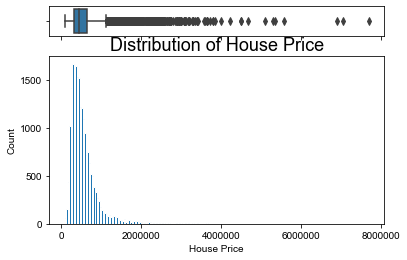

In [8]:
# Create a histogram-boxwhisker of price distribution:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
# Add a graph in each part
sns.boxplot(kc_housing["price"], ax=ax_box)
sns.set(style='whitegrid', palette="deep", font_scale=1.5, rc={"figure.figsize": [20, 5]})
sns.distplot(
    kc_housing['price'], norm_hist=False, kde=False, bins=200, hist_kws={"alpha": 1}
).set(xlabel='House Price', ylabel='Count')
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.title('Distribution of House Price')

# plt.savefig("Fig1: house_price_dist.png")

Text(0, 0.5, 'House Price')

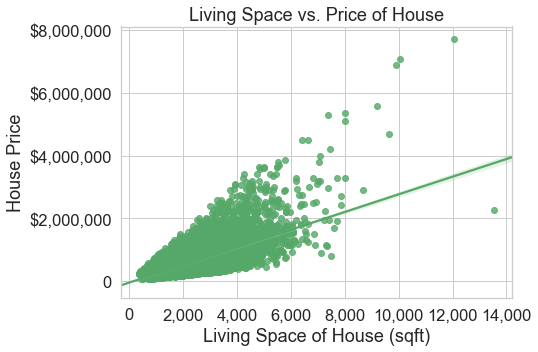

In [9]:
#create a regression plot for sqft living vs price
sqft_living = kc_housing['sqft_living']
price = kc_housing['price']/1000000
sqftliving = pd.DataFrame(kc_housing, columns = ['sqft_living', 'price'])
sns.set(style='whitegrid', palette="deep", font_scale=1.5, rc={"figure.figsize": [7, 5]})
sns.regplot(x= sqft_living, y=price, data=sqftliving, color="g").set_title('Living Space vs. Price of House')
plt.yticks([0, 2, 4, 6, 8], ['0', '$2,000,000', '$4,000,000', '$6,000,000', '$8,000,000'])
plt.xticks([0, 2000, 4000, 6000, 8000, 10000, 12000, 14000], ['0', '2,000', '4,000', '6,000', '8,000', '10,000', '12,000', '14,000'])
plt.xlabel('Living Space of House (sqft)')
plt.ylabel('House Price')
# plt.savefig("Fig2: sqft_price.png")

Text(0, 0.5, 'House Price')

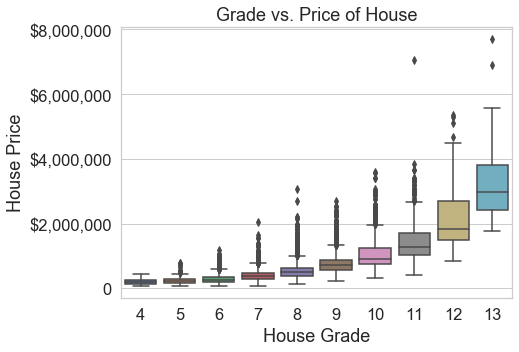

In [10]:
#whisker plot of price distribution among the different grades
grade = kc_housing['grade']
price= kc_housing['price']/1000000
grade_df = pd.DataFrame(kc_housing, columns = ['grade', 'price'])
sns.boxplot(x= grade, y=price, data=grade_df).set_title('Grade vs. Price of House')

plt.yticks([0, 2, 4, 6, 8], ['0', '$2,000,000', '$4,000,000', '$6,000,000', '$8,000,000'])
plt.xlabel('House Grade')
plt.ylabel('House Price')
# plt.savefig("Fig3: grade_price.png")

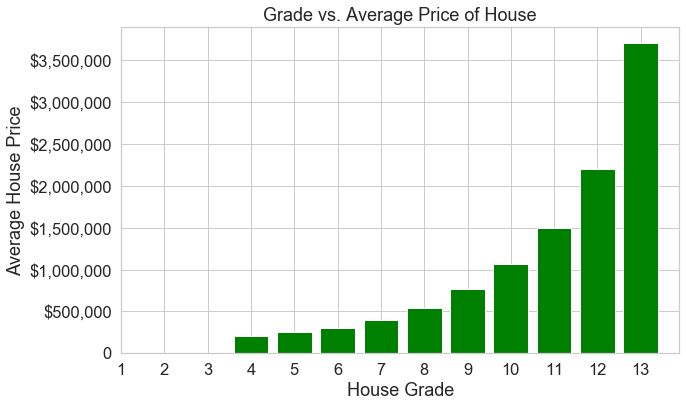

In [11]:
#bar graph with mean price per grade
freq_grade = kc_housing['grade'].value_counts()
freq_grade_list = list(freq_grade.head(13).keys())

main_df_grade = []
for n in freq_grade_list:
    main_df_grade.append(kc_housing.loc[(kc_housing['grade'] == n)])


main_df_grade = pd.concat(main_df_grade)
grade_price = main_df_grade.groupby(kc_housing['grade']).mean()

grade_price = grade_price.sort_values(by='price',ascending=False)
X = grade_price.index
y = grade_price['price']/1000000
fig = plt.figure(figsize=(10, 6))
ax = plt.subplot()

plt.bar(X,y, color = 'green')


plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13])
plt.yticks([0.00, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5], ['0', '$500,000', '$1,000,000', '$1,500,000', '$2,000,000', '$2,500,000', '$3,000,000', '$3,500,000'])

plt.title('Grade vs. Average Price of House')
plt.xlabel('House Grade')
plt.ylabel('Average House Price')
plt.show()

# plt.savefig("Fig4: mean_grade_price.png")

In [12]:
X = kc_housing[['bedrooms', 'bathrooms','sqft_living','floors','condition','yr_built', 'zipcode','sqft_living15', 'sqft_lot15', 'sqft basement']].values
# we will not use grade because we are using zipcode in this model
y = np.log(kc_housing['price'].values)

# Add constants for the intercept term:
Xconst = sm.add_constant(X)

model1 = sm.OLS(y, Xconst, hasconst= True)
multiple_model_fitted1 = model1.fit()


model_summary1 = multiple_model_fitted1.summary()

In [13]:
#Define variables for modeling
y = 'price'
# Note that we excluded price from x_cols.
x_cols = ['bedrooms', 'bathrooms', 'sqft_living','floors','condition','yr_built', 'zipcode','sqft_living15', 'sqft_lot15', 'sqft basement']
#Define categorical variables
categorical_variables = ['floors', 'condition', 'zipcode']
#bedrooms as categorical will lose relationship

In [14]:
#create dummies for categorical variables
df_ohe = pd.get_dummies(kc_housing[x_cols], columns= categorical_variables, drop_first =True)


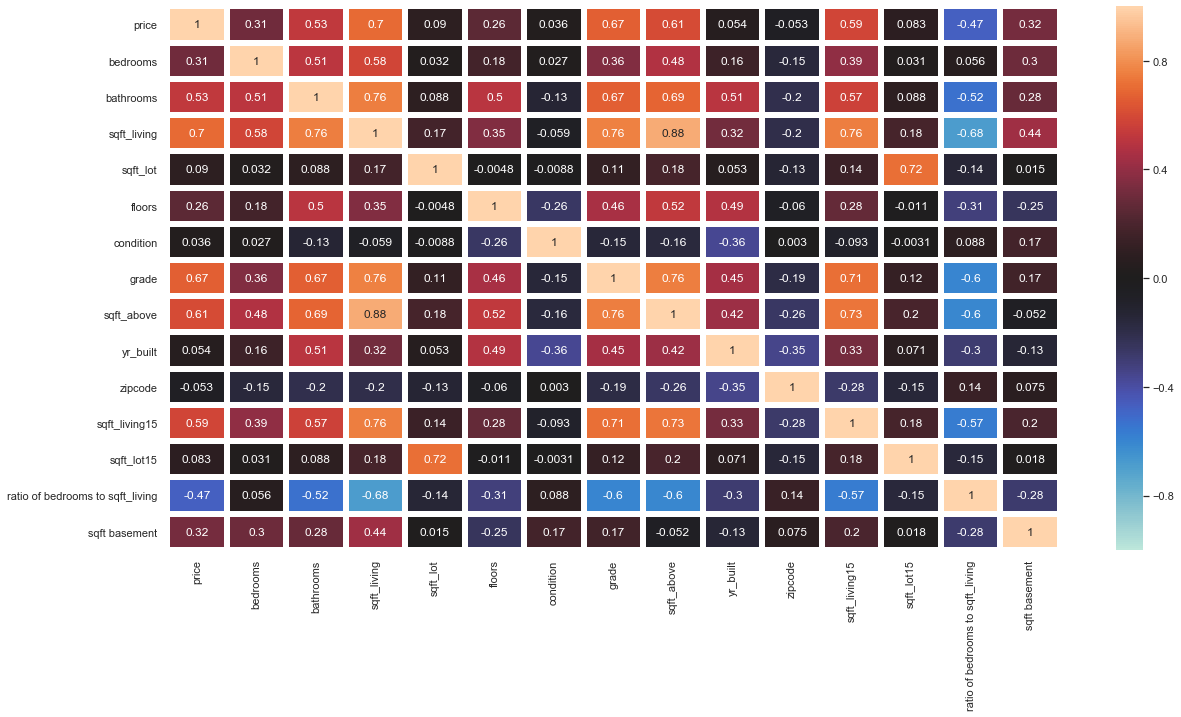

In [ ]:
#create heatmap and pairplots to check for correlations
kc_housing_corr = kc_housing.corr()
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.heatmap(kc_housing_corr, center=0, vmin=-1, vmax=1, linewidth = 5, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
sns.pairplot(kc_housing)
plt.show()

In [ ]:
#print a model summary for our new dataframe df_ohe with log of price because the price distribution was skewed to the right
X = df_ohe.values
y = np.log(kc_housing['price'].values)

# Add constants for the intercept term:
Xconst = sm.add_constant(X)

model2 = sm.OLS(y, Xconst, hasconst= True)
multiple_model_fitted2 = model2.fit()


model_summary2 = multiple_model_fitted2.summary()

In [ ]:
#remove const with p_value>0.05
list_of_const = [4,10,12, 29, 36, 56]
iteration = 0
cleaned_column_list = []
for x in list(df_ohe.columns):
    iteration += 1
    for num in list_of_const:
        if(iteration == num):
            cleaned_column_list.append(x)

In [ ]:
cleaned_column_list

In [ ]:
#drop columns, from dataframe, that are not statistically significant
df_ohe = df_ohe.drop(columns = cleaned_column_list)

In [ ]:
#recheck statsmodel summary
#adjusted R squared is 0.846

X = df_ohe.values
y = np.log(kc_housing['price'].values)

Xconst = sm.add_constant(X)

model3 = sm.OLS(y, Xconst, hasconst= True)
multiple_model_fitted3 = model3.fit()


model_summary3 = multiple_model_fitted3.summary()

In [ ]:
#change df_ohe to a numpy array for training
x_array = df_ohe.to_numpy()


In [ ]:
#change housing price serie to a numpy array
y_array = kc_housing['price'].to_numpy()

In [ ]:
#create a log version of the price because the price distribution is skewed
y_array_log = np.log(y_array)

In [ ]:
#split data into 80% test and 20% train
X_train, X_test, y_train, y_test = train_test_split(x_array, y_array_log, test_size=0.2, random_state=50)

In [ ]:
# To find the best fit line:
lr = LinearRegression()
model = lr.fit(X_train, y_train)

# coefficients (m slope)
m = lr.coef_

# y-intercept b
b = lr.intercept_

In [ ]:
#create a list of column names
columns_list = df_ohe.columns

In [ ]:
#create an empty dataframe
model_df = pd.DataFrame()

In [ ]:
#add column names to the column 'Variables'
model_df['Variables'] = columns_list

In [ ]:
#add coefficients to the column 'Coefficients'
model_df['Coefficients'] = m

In [ ]:
#add a price factor column 
#we took np.log(price) which is like log_{e}. Do e*coefficients to reverse it
model_df['price factor'] = math.e**(model_df['Coefficients'])

In [ ]:
#sort model
sorted_model_df = model_df.sort_values(by='price factor', ascending=False)

In [ ]:
#resetting the index
sorted_model_df = sorted_model_df.reset_index()
#dropping old index 
sorted_model_df = sorted_model_df.drop(columns = ['index'])

In [ ]:
#plot price factor 
sns.set_context('talk')
fig = plt.figure(figsize=(35, 45))
plt.tight_layout()

ax = sns.barplot(x="Variables", y='price factor', data=sorted_model_df)
ax.set(xlabel='Variables')
plt.xticks(rotation=90)
plt.title('Variables vs. Price Factor')
# plt.savefig("Fig 5: variables_pricefactor.png")

In [ ]:
#perform a cross validation
from sklearn.model_selection import cross_val_score
cv_5_results  = (cross_val_score(lr, X_train, y_train, cv=5,  scoring='r2'))
cv_5_results.mean()


In [ ]:
#create a residual map
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot


#Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure
# plt.savefig("Fig6: residuals.png")